# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [15]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [6]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        ### your implementation for bubble sort goes here
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        
        for i in range(n):
            for j in range(n - i - 1):
                if self.sorted_items[j] > self.sorted_items[j + 1]:
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]
                    
    def get_sorted(self,):
        return self.sorted_items

In [7]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here         
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)

        for index in range(1, n):
            while index > 0 and self.sorted_items[index] < self.sorted_items[index-1]:
                self.sorted_items[index],self.sorted_items[index-1] = self.sorted_items[index-1],self.sorted_items[index]
                index -= 1
            

    def get_sorted(self,):
        return self.sorted_items

In [8]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        
        ### your implementation for insertion sort goes here    
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        
        for i in range(n-1):
            smallest_index = i
            for j in range(i+1, n):
                if self.sorted_items[j] < self.sorted_items[smallest_index]:
                    smallest_index = j
            self.sorted_items[i], self.sorted_items[smallest_index] = self.sorted_items[smallest_index], self.sorted_items[i]   

    def get_sorted(self,):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [9]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

#list0 = create_custom_list(100,1000)
#print(list0)
#found1 = BubbleSort(list0)
#found2 = InsertionSort(list0)
#found3 = SelectionSort(list0)
#print(found1.get_sorted())
#print(found2.get_sorted())
#print(found3.get_sorted())
#print(found1.get_sorted() == found2.get_sorted() and found1.get_sorted() ==  found3.get_sorted())

In [10]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

[971, 968, 526, 252, 530, 421, 814, 455, 998, 813, 285, 132, 712, 562, 965, 876, 411, 571, 427, 251]
Avg :  0.001002300499994817


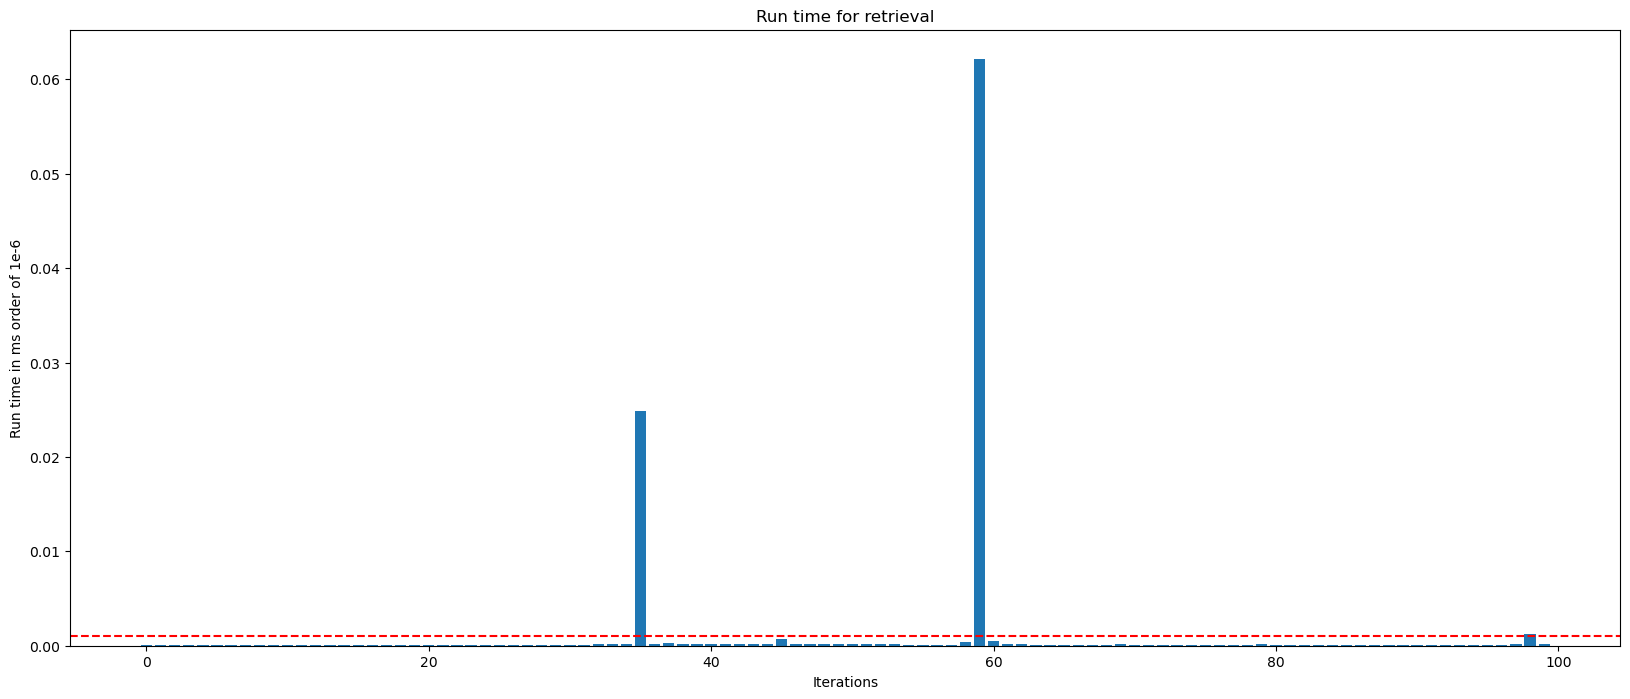

In [11]:
runs = 100
my_list=create_custom_list(20,1000)
print(my_list)

### Bubble sort experiment code goes here
run_times = []
for _ in range(runs):
    start = timeit.default_timer()
    found = BubbleSort(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)
avg1 = sum(run_times)/len(run_times)
print("Avg : ", avg1)
draw_plot(run_times)

[971, 968, 526, 252, 530, 421, 814, 455, 998, 813, 285, 132, 712, 562, 965, 876, 411, 571, 427, 251]
Avg :  0.00012023309999904087


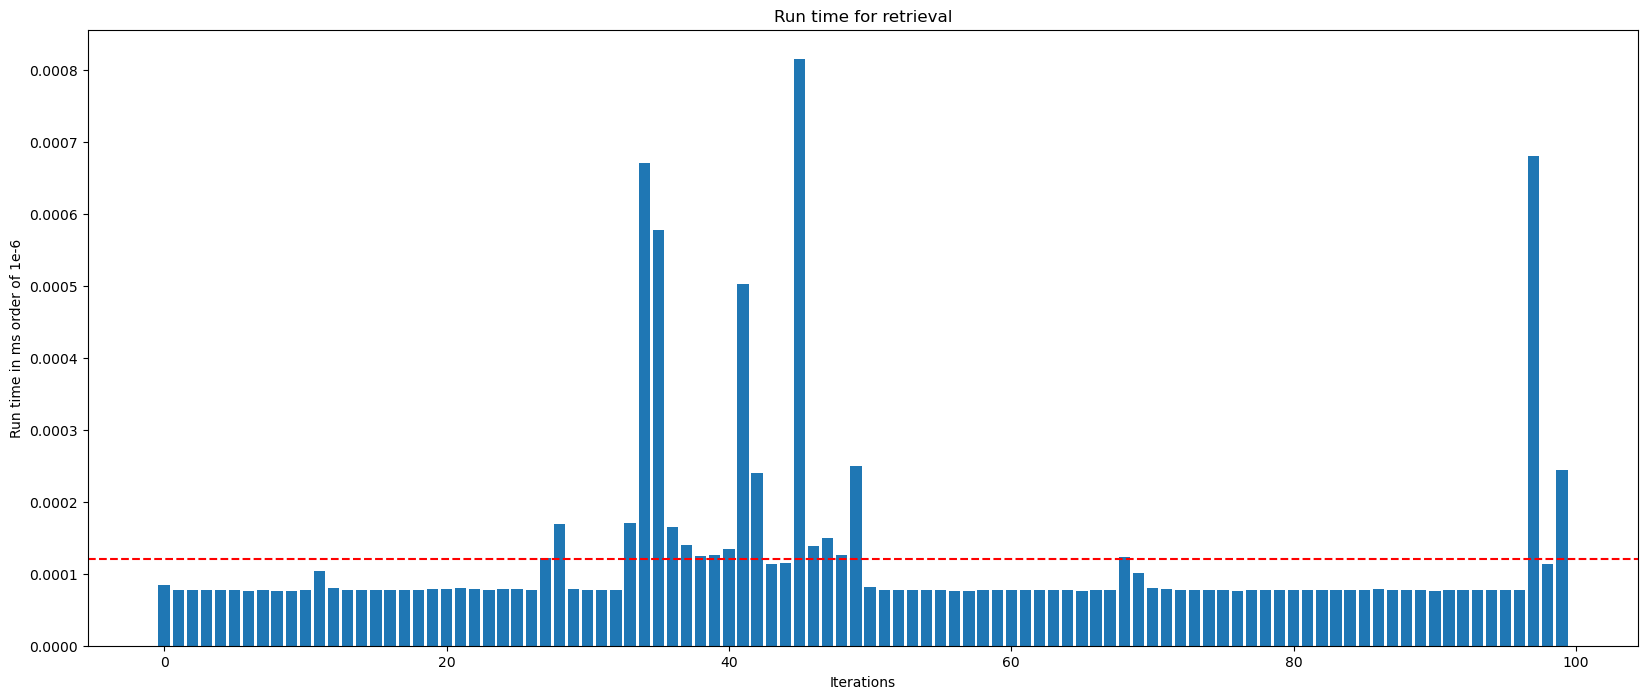

In [12]:
### Insertion sort experiment code goes here
run_times = []
print(my_list)
for _ in range(runs):
    start= timeit.default_timer()
    found = InsertionSort(my_list)
    stop=timeit.default_timer()
    run_times.append(stop-start)
avg2 = sum(run_times)/len(run_times)
print("Avg : ", avg2)

draw_plot(run_times)


[971, 968, 526, 252, 530, 421, 814, 455, 998, 813, 285, 132, 712, 562, 965, 876, 411, 571, 427, 251]
Avg :  5.570995999732986e-05


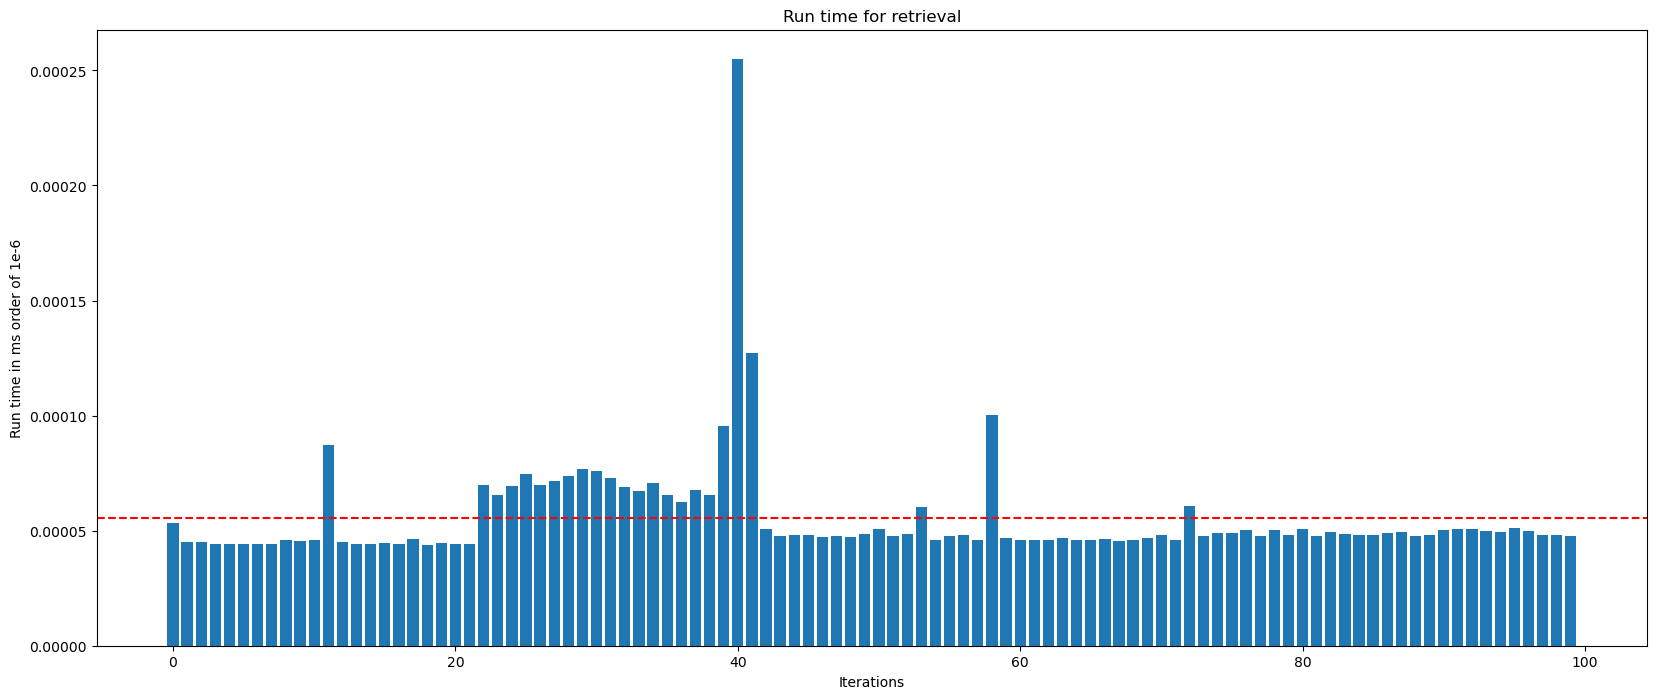

5.570995999732986e-05 < 0.001002300499994817


In [13]:
### Selection sort experiment code goes here
run_times = []
print(my_list)
for _ in range(runs):
    start= timeit.default_timer()
    found = SelectionSort(my_list)
    stop=timeit.default_timer()
    run_times.append(stop-start)
avg3 = sum(run_times)/len(run_times)
print("Avg : ", avg3)
draw_plot(run_times)

#comparison
avg = [avg1, avg2, avg3]
print(min(avg), "<", max(avg))

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


---While the three sorting algorythms all have the worst time complexity of O(n^2), Insertion Sort and Selection Sort had much bettter time complexity than Bubble Sort. This is because Bubble Sort deals with larger datasets. Insertion Sort and Selection Sort have similar time complexities, but their actual performance can vary based the input data. The efficiency of sorting algorithms is influenced by factors such as the initial order and size of the list, and their design of algorithm.

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [14]:
### Bubble sort experiment code goes here
my_list = create_custom_list(1000,1000)
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = BubbleSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')

KeyboardInterrupt: 

In [ ]:
### Insertion sort experiment code goes here
N = 100
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = InsertionSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')






In [ ]:
### Selection sort experiment code goes here
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = SelectionSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

---All three line graphs are the graph of exponential functions, which corresponds with their average time complexity of O(n^2). Selection Sort was by far the fastest compared to the other two because it minimizes the number of swaps by directly selecting the smallest element in each iteration, resulting in fewer overall operations. 

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [ ]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
 
# Function to perform quicksort
def quicksort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
 
        quicksort(array, low, pi - 1)
        quicksort(array, pi + 1, high)
  
def create_near_sorted_list(length, max_value):
    array=create_custom_list(length-3,max_value)
    quicksort(array, 0, len(array) - 1)
    unsortedArray = create_custom_list(3,max_value)
    return(array + unsortedArray)
    
### Bubble sort experiment code goes here

r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = BubbleSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = BubbleSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()



In [ ]:
### Selection sort experiment code goes here
r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = SelectionSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = SelectionSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()

In [ ]:
### Insertion sort experiment code goes here
r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = InsertionSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = InsertionSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

---For unsorted lists, the fastest is Insertion Sort and the slowest is Selection Sort. For near sorted lists, the fastest is Selection Sort and the slowest is Bubble Sort. Selection Sort can have the minimum number of swaps, resulting in the best time complexity. For Bubble Sort and Insertion Sort, the time complexities for unsorted and near sorted lists are close even though near sorted lists can be sorted slightly faster.  
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [16]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [17]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [18]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

item :  898


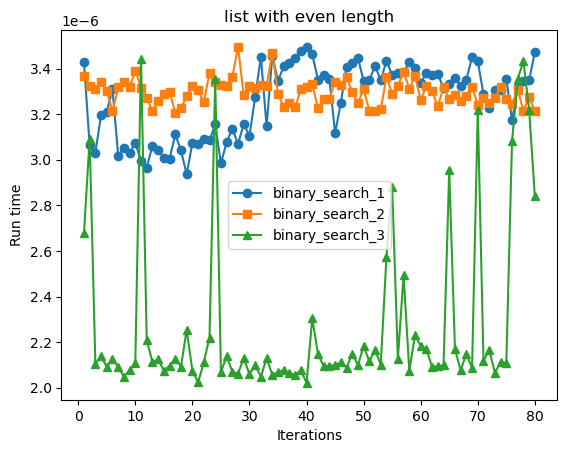

item :  898


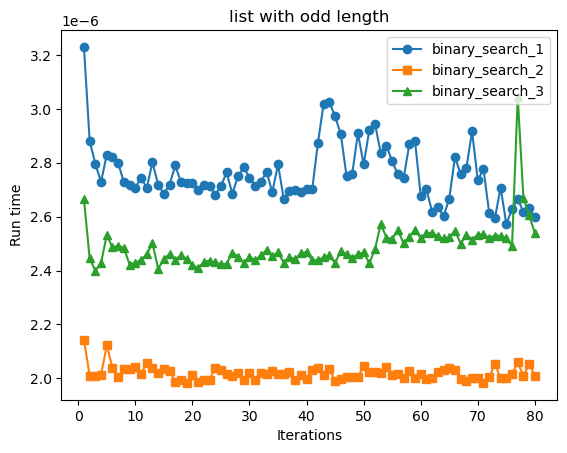

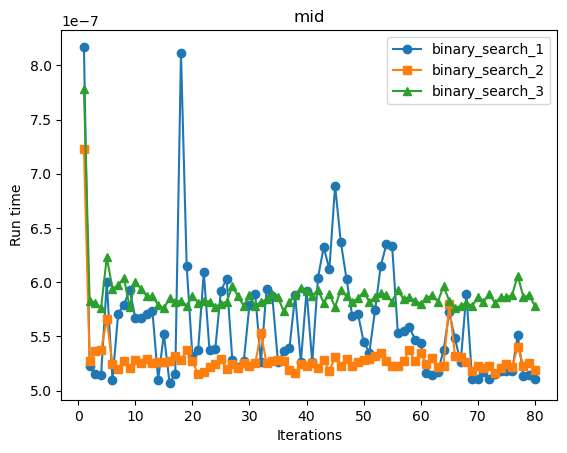

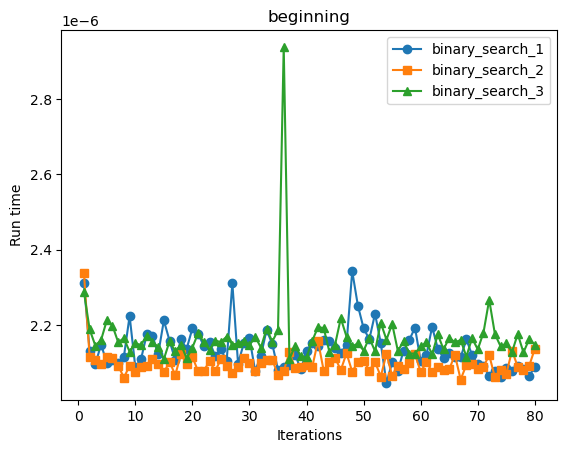

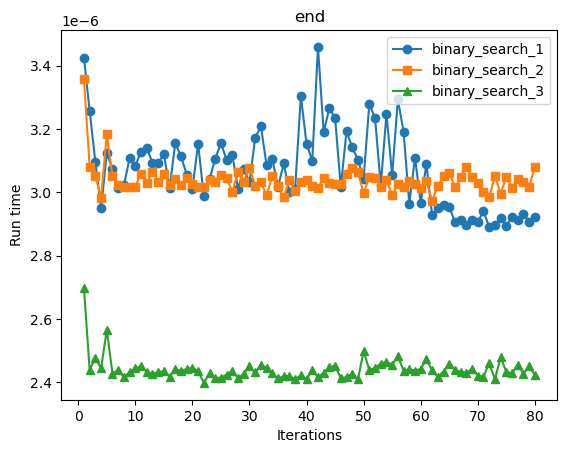

In [55]:
def run_times(binary_search, search_list, to_find, bound):
    run_times = []
    while len(run_times) < 81:
        start = timeit.default_timer()
        found = binary_search(search_list, to_find)
        stop = timeit.default_timer()
        if (stop - start) < bound:
            run_times.append(stop-start)
    return run_times

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1,81)]
    plt.figure()
    plt.plot(x_values, y1[1:], label="binary_search_1", marker='o')
    plt.plot(x_values, y2[1:], label="binary_search_2", marker='s')
    plt.plot(x_values, y3[1:], label="binary_search_3", marker='^')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

# list with even length
even_list = [i for i in range(1000)] # length = 1000
to_find = random.randint(0, 999)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, even_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, to_find, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'list with even length')

# list with odd length
odd_list = [i for i in range(1001)] # length = 1001
print("item : ", to_find)
run_times1 = run_times(binary_search_1, odd_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, odd_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, odd_list, to_find, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'list with odd length')

# mid
run_times1 = run_times(binary_search_1, even_list, 499, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 499, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 499, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'mid')

# beginning
run_times1 = run_times(binary_search_1, even_list, 0, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 0, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 0, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'beginning')

# end
run_times1 = run_times(binary_search_1, even_list, 999, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 999, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 999, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'end')

**Reflection**:

I defined two functions to avoid redundancy in each experiment and also set up an upper bound of run time so that the graphs can be more visible. Here's the observations of each experiment.

[even] The result depended on where the index of item is. When it's at the beginning of the list, binary_search_3 was the fastest.

[odd] The result also depended on the position of item. The run time was fairly faster than the list of even length.

[mid] When the item was at the middle, binary_search_3 was the slowest because it has "item_list[mid] == to_find" as the last condition while it's the first condition for binary_search_1 and binary_search_2.

[beginning] binary_search_2 was the fastest due to the assignment "upper = mid - 1", not "upper = mid" or "right = mid".

[end] binary_search_3 was by far the fastest because it has "item_list[mid] < to_find" as the first condition.

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [25]:
def binary_search_4(item_list, to_find):
    mid = (len(item_list)-1) // 2
    if item_list[mid] < to_find:
        return binary_search_4(item_list[(mid+1):], to_find)
    elif item_list[mid] > to_find:
        return binary_search_4(item_list[:mid], to_find)
    else:
        return True

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

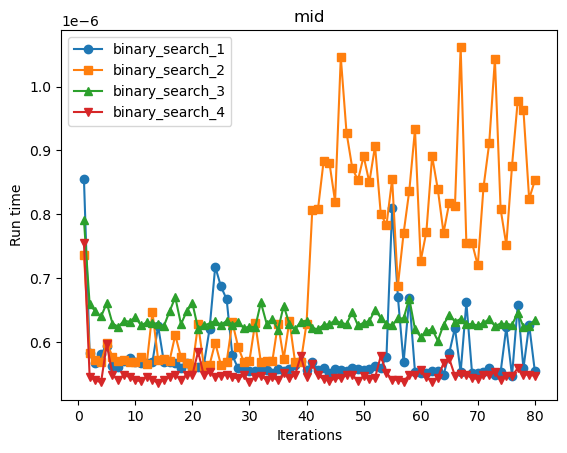

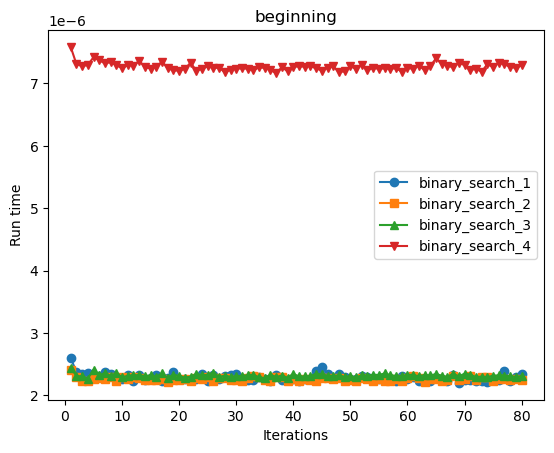

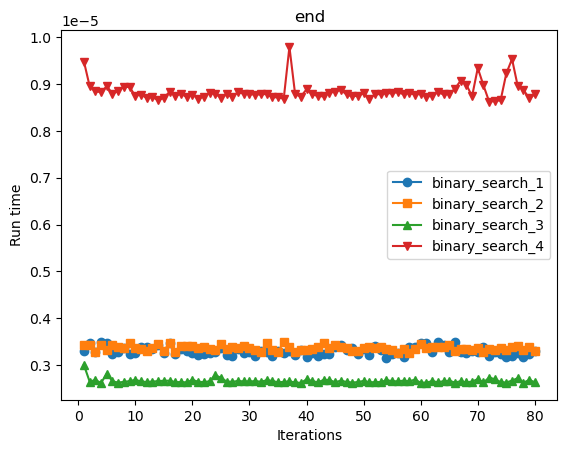

item :  837


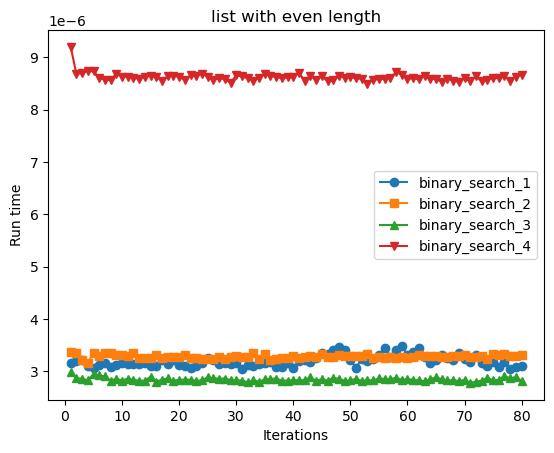

item :  822


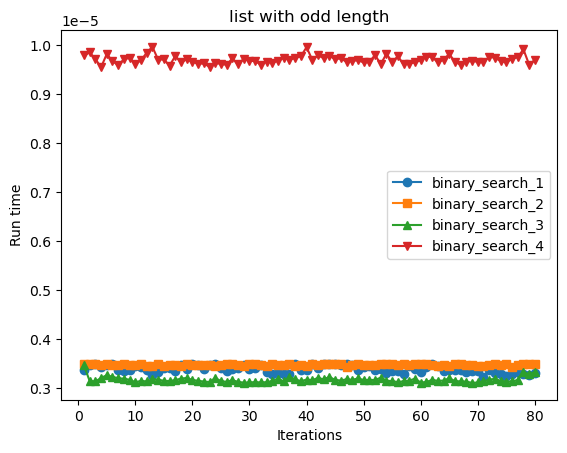

index of item :  705


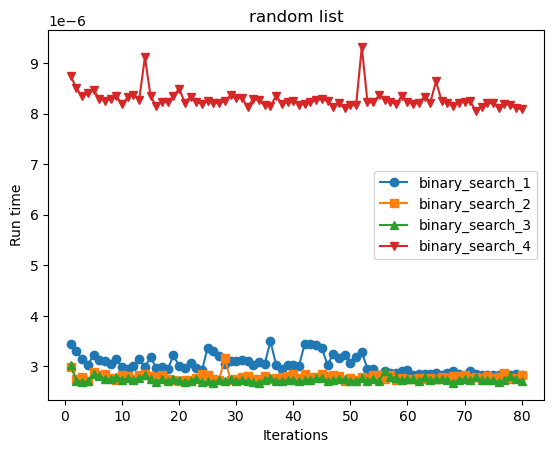

In [57]:
# your implementation and experiments go here.
def draw_4_graphs(y1, y2, y3, y4, title):
    x_values = [i for i in range(1,81)]
    plt.figure()
    plt.plot(x_values, y1[1:], label='binary_search_1', marker='o')
    plt.plot(x_values, y2[1:], label='binary_search_2', marker='s')
    plt.plot(x_values, y3[1:], label='binary_search_3', marker='^')
    plt.plot(x_values, y4[1:], label='binary_search_4', marker='v')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()
    
# mid
run_times1 = run_times(binary_search_1, even_list, 499, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 499, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 499, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 499, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'mid')
    
# beginning
run_times1 = run_times(binary_search_1, even_list, 0, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 0, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 0, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 0, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'beginning')

# end
run_times1 = run_times(binary_search_1, even_list, 999, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 999, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 999, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 999, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'end')

# list with even length
to_find = random.randint(0, 999)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, even_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, to_find, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, to_find, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'list with even length')

# list with odd length
to_find = random.randint(0, 1000)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, odd_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, odd_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, odd_list, to_find, 3.5e-6)
run_times4 = run_times(binary_search_4, odd_list, to_find, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'list with odd length')

# random list
random_list = sorted(create_custom_list(1000, 10000))
to_find = random.randint(0, 999)
print("index of item : ", to_find)
run_times1 = run_times(binary_search_1, random_list, random_list[to_find], 3.5e-6)
run_times2 = run_times(binary_search_2, random_list, random_list[to_find], 3.5e-6)
run_times3 = run_times(binary_search_3, random_list, random_list[to_find], 3.5e-6)
run_times4 = run_times(binary_search_4, random_list, random_list[to_find], 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'random list')


##### Result Discussion:

In general, binary_search_4 was much slower than the other three. However, when the item is right at the middle, it was faster than the other three searches. This is because, there's a condition for the while loop in other three searches, like "lower <= upper", which doesn't exist in binary_search_4. Therefore, it can go staright into the if statements.

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [23]:
# your implementation and experiments go here.

# HeapSort
def heapify(arr, N, i):
    largest = i  
    l = 2 * i + 1     
    r = 2 * i + 2     

    if l < N and arr[largest] < arr[l]:
        largest = l
    if r < N and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)
    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)
    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

# MergeSort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
 
        mergeSort(L)
        mergeSort(R)
 
        i = j = k = 0
 
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# QuickSort 
def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

def partition(arr, low, high):
    i = low - 1
    pivot = arr[high]

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

In [ ]:
# on randomly generated lists and plots the execution times for each algorithm over 100 runs.

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 21)]  # Cover all 10 data points for each algorithm
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

    
runs = 75

run_times1 = []
for _ in range(runs):
    my_list1=create_custom_list(10,100)
    start = timeit.default_timer()
    found = heapSort(my_list1)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

run_times2 = []
for _ in range(runs):
    my_list2=create_custom_list(10,100)
    start = timeit.default_timer()
    found = mergeSort(my_list2)
    stop = timeit.default_timer()
    run_times2.append(stop-start)

run_times3 = []
for _ in range(runs):
    my_list3=create_custom_list(10,100)
    start = timeit.default_timer()
    found = quicksort(my_list3, 0, len(my_list3) - 1)
    stop = timeit.default_timer()
    run_times3.append(stop-start)

draw_plot(run_times1)
draw_plot(run_times2)
draw_plot(run_times3)

In [ ]:
def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 100, 10)]  # Adjusted to match the length of y1, y2, y3
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

my_list = create_custom_list(100,100)
run_times1 = []
lengths1 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = heapSort(aux)
    stop=timeit.default_timer()
    run_times1.append(stop-start)
    lengths1.append(length)
    
my_list = create_custom_list(100,100)
run_times2 = []
lengths2 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = mergeSort(aux)
    stop=timeit.default_timer()
    run_times2.append(stop-start)
    lengths2.append(length)
    
my_list = create_custom_list(100,100)
run_times3 = []
lengths3 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = quicksort(aux, 0, len(aux) - 1)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    lengths3.append(length)
    
draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

In [24]:
# your implementation and experiments go here.
class MergeSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        self.list = self.items[:]
        self.mergeSort(self.list)
        self.sorted_items = self.list

    def mergeSort(self, nums):
        if len(nums) < 2:
            return 0 #ending recursion
        mid_i = len(nums)//2
        lefthalf = nums[:mid_i]
        righthalf = nums[mid_i:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        merge(nums, lefthalf, righthalf)

    def merge(self, result: [int], lhalf: [int], rhalf: [int]):
        lpointer = 0
        rpointer = 0
        fpointer = 0
        while lpointer < len(lhalf) and rpointer < len(rhalf):
            if lhalf[lpointer] < rhalf[rpointer]:
                result[fpointer] = lhalf[lpointer]
                lpointer +=1
            else:
                result[fpointer] = rhalf[rpointer]
                rpointer +=1
            fpointer +=1
        if lpointer >= len(lhalf):
            for i in range(rpointer, len(rhalf)):
                result[fpointer] = rhalf[i]
                fpointer +=1
        else:
            for i in range(lpointer, len(lhalf)):
                result[fpointer] = lhalf[i]
                fpointer +=1
        

    def get_sorted(self,):
        return self.sorted_items




diff_span = [0] * ((10000 - 10)//300)
current_index_diff = 0
for i in range(10, 10000, 300):
    random_list = create_custom_list(i, 2*i)
    time_sum
    
    for i in range(50):
        time_sum = 0
        start_merge = timeit.default_timer()
        merge(random_list)
        end_merge = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum += interval
    merge_ave = time_sum/50

    for i in range(50):
        time_sum = 0
        start_quick = timeit.default_timer()
        quick(random_list)
        end_quick = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum += interval
    quick_ave = time_sum/50
    diff = merge_ave - quick_ave
    diff_span[current_index_diff] = diff
    current_index_diff +=1
draw_plot(diff_span)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [25]:
# your implementation and experiments go here.
class MergeSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        self.list = self.items[:]
        self.mergeSort(self.list)
        self.sorted_items = self.list

    def mergeSort(self, nums):
        if len(nums) < 2:
            return 0 #ending recursion
        mid_i = len(nums)//2
        lefthalf = nums[:mid_i]
        righthalf = nums[mid_i:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        merge(nums, lefthalf, righthalf)

    def merge(self, result: [int], lhalf: [int], rhalf: [int]):
        lpointer = 0
        rpointer = 0
        fpointer = 0
        while lpointer < len(lhalf) and rpointer < len(rhalf):
            if lhalf[lpointer] < rhalf[rpointer]:
                result[fpointer] = lhalf[lpointer]
                lpointer +=1
            else:
                result[fpointer] = rhalf[rpointer]
                rpointer +=1
            fpointer +=1
        if lpointer >= len(lhalf):
            for i in range(rpointer, len(rhalf)):
                result[fpointer] = rhalf[i]
                fpointer +=1
        else:
            for i in range(lpointer, len(lhalf)):
                result[fpointer] = lhalf[i]
                fpointer +=1
        

    def get_sorted(self,):
        return self.sorted_items




diff_span = [0] * ((10000 - 10)//300)
current_index_diff = 0
for i in range(10, 10000, 300):
    random_list = create_custom_list(i, 2*i)
    time_sum
    
    for i in range(50):
        time_sum = 0
        start_merge = timeit.default_timer()
        merge(random_list)
        end_merge = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum += interval
    merge_ave = time_sum/50

    for i in range(50):
        time_sum = 0
        start_quick = timeit.default_timer()
        quick(random_list)
        end_quick = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum += interval
    quick_ave = time_sum/50
    diff = merge_ave - quick_ave
    diff_span[current_index_diff] = diff
    current_index_diff +=1
draw_plot(diff_span)

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [26]:
## your implementation and code goes here
## your implementation and code goes here
def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(100)]  # Adjusted to match the length of y1, y2, y3
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    plt.plot(x_values, y1, label='Insertion Sort', marker='o')
    plt.plot(x_values, y2, label='Heap Sort', marker='s')
    plt.plot(x_values, y3, label='Merge Sort', marker='^')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title('Run time for retrieval')
    plt.legend()
    plt.show()
    
runs = 100

run_times1 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start = timeit.default_timer()
    found = InsertionSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)
    
run_times2 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start = timeit.default_timer()
    found = heapSort(my_list)
    stop = timeit.default_timer()
    run_times2.append(stop - start)

    
run_times3 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start= timeit.default_timer()
    found = mergeSort(my_list)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    
draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

In [ ]:
## your implementation and code goes here
def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1,101,10)]  # Adjusted to match the length of y1, y2, y3
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    plt.plot(x_values, y1, label='Insertion Sort', marker='o')
    plt.plot(x_values, y2, label='Heap Sort', marker='s')
    plt.plot(x_values, y3, label='Merge Sort', marker='^')
    plt.xlabel('List Lenght')
    plt.ylabel('Run time')
    plt.title('Random List Lenghts')
    plt.legend()
    plt.show()
    
my_list = heapSort(create_custom_list(100,100))

run_times1 = []
lengths1 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = InsertionSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)
    lengths1.append(length)

run_times2 = []
lengths2 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = heapSort(my_list)
    stop = timeit.default_timer()
    run_times2.append(stop-start)
    lengths1.append(length)
    
run_times3 = []
lengths3 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = mergeSort(my_list)
    stop = timeit.default_timer()
    run_times3.append(stop-start)
    lengths1.append(length)

draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')


### Experiment Outline:
The primary objective of our experiments was to prove that the conventional notion that the performance of Insertion Sort is worse than Heap Sort and Merge Sort. We aimed to demonstrate that Insertion Sort can outperform these algorithms in specific scenarios, particularly when the input list is already sorted.

For the first experiment, we generated sorted lists of a fixed length (100 elements) and ran each sorting algorithm—Insertion Sort, Heap Sort, and Merge Sort—100 times on these lists. This allowed us to measure and compare the runtime performance of each algorithm on pre-sorted data comprehensively.

The second experiment extended our exploration to various list lengths, ranging from 1 to 100 with intervals of 10, and focused on comparing the algorithms' performance on randomly generated lists that were already sorted. Again, the runtime for each sorting algorithm was meticulously measured to provide a thorough understanding of their comparative efficiency in different scenarios.

### Graphs:
The initial graph depicted the results of the first experiment, with iterations on the x-axis and runtime on the y-axis for Insertion Sort, Heap Sort, and Merge Sort. This visualization offered insights into how the algorithms performed, on average, across pre-sorted lists of the same length. The second graph delved into the performance of the algorithms on lists of varying lengths, emphasizing Insertion Sort's potential to outshine the others in scenarios where the input was already sorted.

### Discussion and Conclusion:
Our experiments revealed a notable trend in favor of Insertion Sort when dealing with pre-sorted lists. While Heap Sort and Merge Sort maintained consistent performance regardless of the input list's order, Insertion Sort excelled when the list was already sorted, showcasing its effectiveness in best-case scenarios.

### Significance of Experiments:
These experiments hold significant implications as they prompt a reconsideration of the perceived hierarchy among sorting algorithms. Understanding the specific conditions under which Insertion Sort can outperform its counterparts is crucial for informed algorithm selection, contributing to more effective and optimized solutions in real-world applications.

**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

Sota Nakamura (nakamurs) worked on Insertion Sort on part A, part B and part C.\n
Harsh Upadhyay (upadhh1) worded on bubble Sort on Part A, Part D and Part F.\n
Oliver Li (li2177) worked on Selection Sort on Part A, and Part E.

---